In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
path = '/Users/ginazhou/Documents/GitHub/alli/kindful_report.csv'
df = pd.read_csv(path)


In [3]:
df.rename(columns={'kindful_report-2': 'amt', 
                    'Unnamed: 1': 'dates',
                    'Unnamed: 2': 'addr', 
                    'Unnamed: 3': 'city',
                    'Unnamed: 4': 'state',
                    'Unnamed: 5': 'zipcode'}, inplace=True)

df

,amt,dates,addr,city,state,zipcode
0,US$25.00,"December 20, 2022",,Melville,NY,11747
1,US$50.00,"November 15, 2022",,West Sayville,NY,11796
2,US$25.00,"April 28, 2022",,West Islip,NY,11795
3,US$25.00,"April 13, 2021",,Hauppauge,NY,11749
4,US$100.00,"November 30, 2021",,Huntington,NY,11743
...,...,...,...,...,...,...
514,US$125.00,"April 30, 2025",,Sands Point,NY,11050
515,US$125.00,"May 2, 2025",,Locust Valley,NY,11560
516,US$250.00,"May 3, 2025",#2112,North Hills,NY,11040
517,US$250.00,"May 3, 2025",,Oyster Bay,New York,11771


# RERUN THE SAME CODE, SET THRESH <$400 TO CAPTURE ONLY THE TUITION? 

In [4]:
# remove any amt that's greater than 2000
df['amt'] = df['amt'].replace('[\$US,]', '', regex=True).astype(float)
df = df[df['amt'] < 400]

In [5]:
print(f"# of cities: {len(df['city'].unique())}")

# distribution
df['city'].value_counts().head(10)

# of cities: 180


city
Huntington            36
Dix Hills             25
Northport             21
Huntington Station    17
Melville              15
Commack               15
East Northport        15
Greenlawn             10
Plainview              8
Centerport             7
Name: count, dtype: int64

^ huntington definitely tops the list.. 

does marianne see any patterns here? 

## check out the township maps, huntington / huntington station are surrouded by Northport (NE), Commack (E), DixHill (SE), Melville (S), Hicksville (SW), Syosset (W). that covers most of these enrollments. 

## greenlawn is a pocket between huntington and northport. 




In [6]:
print(f"# of zip code: {len(df['zipcode'].unique())}")

# distribution of zip codes
df['zipcode'].value_counts().head(10)


# of zip code: 147


zipcode
11746    45
11743    39
11768    23
11731    17
11725    16
11747    16
11803    10
11787     9
11740     9
11040     8
Name: count, dtype: int64

In [7]:
# sort amount by year
df['year'] = pd.to_datetime(df['dates'], errors='coerce').dt.year
df.groupby('year')['amt'].sum().reset_index()


/var/folders/45/9flk40nj3h37tds8ywc514n80000gp/T/ipykernel_70629/2067559489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['dates'], errors='coerce').dt.year


,year,amt
0,2020,4350.86
1,2021,8957.00
2,2022,8196.00
3,2023,3008.73
4,2024,7813.35
5,2025,9383.43


^ pandemic definitely made a difference! 
which year was the flood? 2003, so the recovery year 2004 the revenue suffered? 

^ having removed the donations.. the amount seems to be more balanced!  reversion to average?! 

In [8]:
# any seasonality? 
df['month'] = pd.to_datetime(df['dates'], errors='coerce').dt.month
df.groupby(['year', 'month'])['amt'].sum().reset_index().sort_values(by='amt', ascending=False).head(10)

/var/folders/45/9flk40nj3h37tds8ywc514n80000gp/T/ipykernel_70629/1376049415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['dates'], errors='coerce').dt.month


,year,month,amt
6,2021,4,4744.00
25,2022,11,3106.00
49,2025,4,2660.01
37,2024,4,2542.74
48,2025,3,2435.02
3,2020,12,2035.00
47,2025,2,1856.62
46,2025,1,1756.78
26,2022,12,1626.00
2,2020,11,1273.00


^ feb topped the list twice. why?  
nov/dec was also on the top of list.. christmas time? 

^ april 2021 did really well?  post pandemic?  anything else that's special?

## seems to hover around 2-3k a month, and nov - april seem to top the list.

## what happens between may - oct? summer break? kids need no arts class? 

In [9]:
# sort amount by city
df_city_amt = df.groupby('city')['amt'].sum().reset_index().sort_values(by='amt', ascending=False).head(10)
df_city_amt

,city,amt
71,Huntington,3526.23
115,Northport,1902.10
31,Dix Hills,1786.54
122,Plainview,1232.24
73,Huntington Station,1116.28
24,Commack,1086.61
42,East Northport,1086.60
60,Greenlawn,1040.01
98,Melville,1029.95
118,Oyster Bay,828.62


In [10]:
# count # of cities
df_city = df['city'].value_counts().reset_index()
df_city


,city,count
0,Huntington,36
1,Dix Hills,25
2,Northport,21
3,Huntington Station,17
4,Melville,15
...,...,...
175,Westhampton,1
176,Selden,1
177,Nesconset,1
178,Lloyd Harbor,1


In [ ]:
df_city_amt['city'] = df_city_amt['city'].astype(str)
df_city['city'] = df_city['city'].astype(str)
df_city_amt = df_city_amt.merge(df_city, on='city', how='left')

# add an average columns
df_city_amt['avg'] = df_city_amt['amt'] / df_city['count']
df_city_amt

,city,amt,avg,count
0,Huntington,3526.23,97.950833,36
1,Northport,1902.10,76.084000,21
2,Dix Hills,1786.54,85.073333,25
3,Plainview,1232.24,72.484706,8
4,Huntington Station,1116.28,74.418667,17
5,Commack,1086.61,72.440667,15
6,East Northport,1086.60,72.440000,15
7,Greenlawn,1040.01,104.001000,10
8,Melville,1029.95,128.743750,15
9,Oyster Bay,828.62,118.374286,6


^ is the 10k / 5k / 3.5k donations or grants? so should the focus in (1) huntington and nortport local recuits, and (2) grants?! 

which years are those funding from? 


^^ revised: after removing donations, northport despite few counts, brought in more revenue?  why?!  donations again!!! 

## average people spend 70$ - 120$? 


In [19]:
# get more details on the top amounts 
df.loc[(df['city'] == 'Albany') |
       (df['city'] == 'Garden City') |
       (df['city'] == 'Huntington Bay')]


,amt,dates,addr,city,state,zipcode,year,month


^ lots of mini donations northport?  is it an affluent, senior neighbourhood? maybe we need to low the threshold to 1000$? 


## once donation removed, there's no activity from those three places, as expected. 

<Axes: title={'center': 'Distribution of amounts'}>

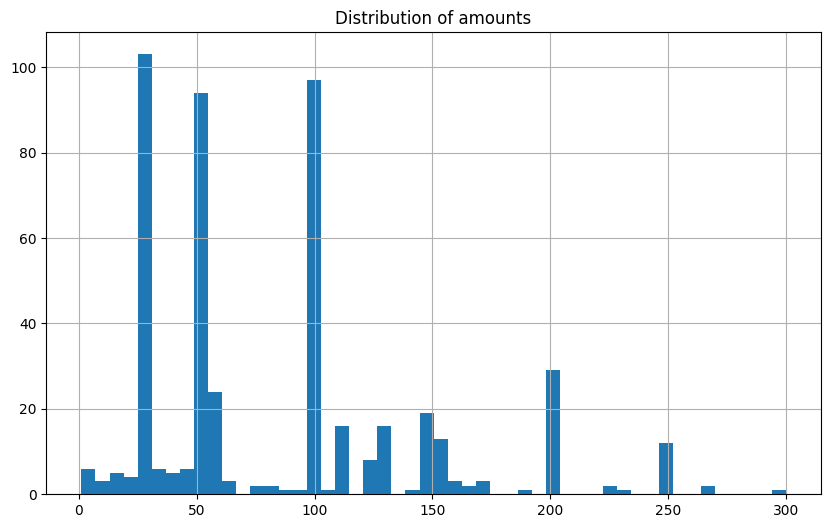

In [20]:
# histogram of amounts, log scale y axis
plt.figure(figsize=(10, 6))
plt.title('Distribution of amounts')    
df['amt'].hist(bins=50)

^ i'm afraid we have to remove hte 2000$ up amounts, becuase they are screwing the analysis.. 

^^ in order to get a good view of income from classes we need to look at sub $400 

## lots of people spend $25 / $50 / $100... mostlikly related to course signups?  maybe a a small 10% increase?  how much is the membership fee?  how many sign up? 